In [ ]:
import numpy as np
import pandas as pd
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [ ]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"R-squared (R²): {r2}")

In [ ]:
print("Linear Regression Performance:")
evaluate_model(y_test, lr_predictions)
# Evaluate Ridge Regression
print("\nRidge Regression Performance:")
evaluate_model(y_test, ridge_predictions)
# Evaluate Lasso Regression
print("\nLasso Regression Performance:")
evaluate_model(y_test, lasso_predictions)

Linear Regression Performance:
Mean Absolute Error (MAE): 0.5332001304956553
Mean Squared Error (MSE): 0.5558915986952444
Root Mean Squared Error (RMSE): 0.7455813830127764
R-squared (R²): 0.5757877060324508

Ridge Regression Performance:
Mean Absolute Error (MAE): 0.5332039182571153
Mean Squared Error (MSE): 0.5558034669932211
Root Mean Squared Error (RMSE): 0.7455222779992702
R-squared (R²): 0.5758549611440126

Lasso Regression Performance:
Mean Absolute Error (MAE): 0.5816074623949868
Mean Squared Error (MSE): 0.6135115198058131
Root Mean Squared Error (RMSE): 0.7832697618354822
R-squared (R²): 0.5318167610318159


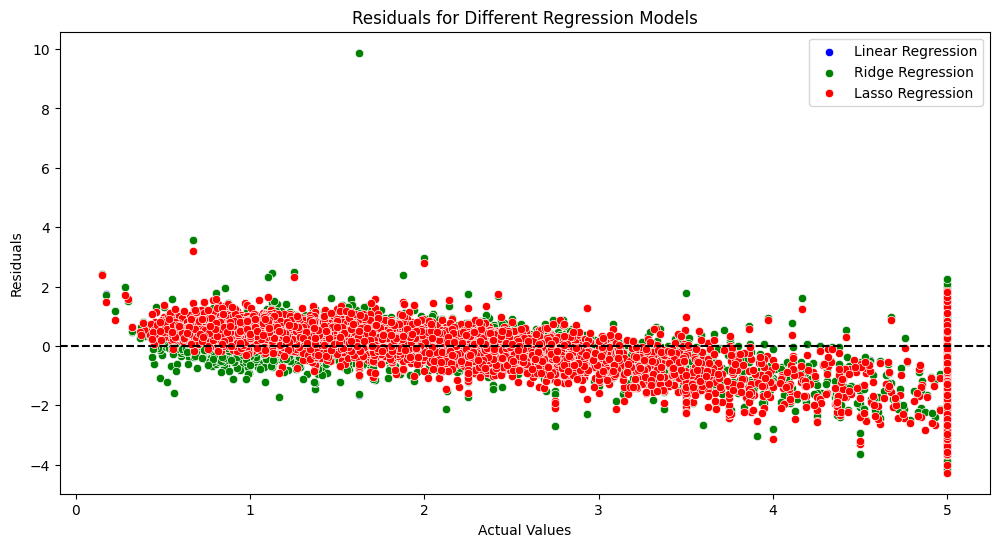

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=lr_predictions - y_test, label="Linear Regression", color="blue")
sns.scatterplot(x=y_test, y=ridge_predictions - y_test, label="Ridge Regression", color="green")
sns.scatterplot(x=y_test, y=lasso_predictions - y_test, label="Lasso Regression", color="red")
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals for Different Regression Models')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()